In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sbn
%matplotlib inline

In [2]:
alysson = pd.read_csv('MARCADOS_CONSISTENCIA/Alysson.csv', sep=';', encoding='utf-8')
alysson.columns = ['id', 'tweet', 'candidato', 'marcador', 'classe']
raul = pd.read_csv('MARCADOS_CONSISTENCIA/Raul.csv', sep=';', encoding='utf-8')
raul.columns = ['id', 'tweet', 'candidato', 'marcador', 'classe']
dalai = pd.read_csv('MARCADOS_CONSISTENCIA/Dalai.csv', sep=';', encoding='utf-8')
dalai.columns = ['id', 'tweet', 'candidato', 'marcador', 'classe']
romulo = pd.read_csv('MARCADOS_CONSISTENCIA/Romulo.csv', sep=';', encoding='utf-8')
romulo.columns = ['id', 'tweet', 'candidato', 'marcador', 'classe']

In [4]:
marcados = [alysson, raul, dalai, romulo]

In [53]:
def auto_consistency(dataframe):
    t = []
    for d in dataframe.values:
        if d[0] in list(dataframe.id[dataframe.duplicated('id')].values) and d[4] != 'Não sei':
            t.append(list(d))
    
    count = 0
    for i in range(0,len(t)):
        for j in range(0,len(t)):
            if i != j and t[i][0] == t[j][0] and t[i][4] == t[j][4]:
                count += 1
    return count/len(t)

In [54]:
auto_consistency(alysson)

0.75

In [51]:
def cross_consistency(df1, df2):
    t = [] #tweets que df2 tem em comum com df1
    l = []
    for v in df2.values:
        if v[0] in df1.id[df1.marcador == df2.values[0][3]].values and v[0] not in l and v[4] != 'Não sei':
            t.append(v)
            l.append(v[0])
    
    t2 = df1[df1.marcador == df2.values[0][3]].values # tweets que df1 tem em comum com df2
    t2 = list(filter(lambda v: v[4] != 'Não sei',t2))
    
    match = 0
    for i in range(0,len(t)):
        for j in range(0,len(t2)):
            if t[i][0] == t2[j][0] and t[i][4] == t2[j][4]:
                match += 1
                
    return match/len(t)

In [52]:
cross_consistency(alysson,raul)

0.8947368421052632

In [55]:
matriz = []
for i in marcados:
    m = []
    for j in marcados:
        v = 0
        if i is j:
            v = auto_consistency(i)
        else:
            v = cross_consistency(i,j)
        m.append(v)
    matriz.append(m)

In [50]:
# Média da matriz de consistência considerando os tweets marcados com 'Não sei'
np.matrix(matriz).mean()

0.6335526315789474

In [56]:
# Média da matriz de consistência desconsiderando os tweets marcados com 'Não sei'
np.matrix(matriz).mean()

0.6280592808142149

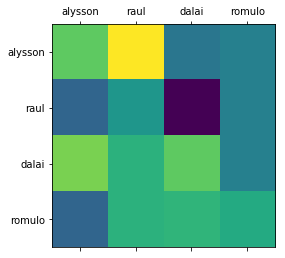

In [57]:
plt.matshow(matriz)
plt.xticks(range(len(marcados)), ['alysson', 'raul', 'dalai', 'romulo'])
plt.yticks(range(len(marcados)), ['alysson', 'raul', 'dalai', 'romulo'])
plt.show()

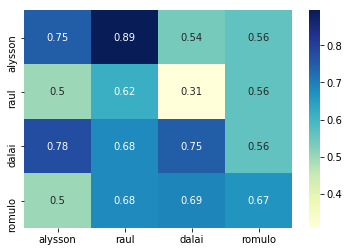

In [58]:
sbn.heatmap(matriz,
            xticklabels=['alysson', 'raul', 'dalai', 'romulo'],
            yticklabels=['alysson', 'raul', 'dalai', 'romulo'], 
            annot=True,
            cmap="YlGnBu")

In [25]:
twt = []
for t in alysson.values:
    if t[0] in list(alysson.id[alysson.duplicated('id')].values):
        twt.append(list(t))

In [51]:
p1 = twt[0:10]
p2 = twt[10:20]

cont = 0
for i in range(0,10):
    if p1[i][4] == p2[i][4]:
        cont += 1
        
print(cont)
print((cont * 10)/100)

8
0.8


In [46]:
twe = []
for t in alysson.values:
    if t[0] in list(alysson.id[alysson.marcador == 'raul'].values):
        twe.append(list(t))